In [1]:
# --- Step 1: Import Required Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# --- Step 2: Load Datasets ---
df_json = pd.read_json("customers.json")
df_excel = pd.read_excel("Sample-Sales-Data.xlsx")
df_csv = pd.read_csv("sales_data_sample.csv", encoding='latin1')

In [6]:
# --- Step 3: Display Basic Info and Shapes ---
print(f"JSON Shape: {df_json.shape}")
print(f"Excel Shape: {df_excel.shape}")
print(f"CSV Shape: {df_csv.shape}\n")

JSON Shape: (9999, 7)
Excel Shape: (390, 5)
CSV Shape: (2823, 25)



In [7]:
print("\n--- Dataset Info ---")
print("JSON Dataset Info:")
print(df_json.info(), "\n")
print("Excel Dataset Info:")
print(df_excel.info(), "\n")
print("CSV Dataset Info:")
print(df_csv.info(), "\n")


--- Dataset Info ---
JSON Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   id          9999 non-null   int64              
 1   email       9999 non-null   object             
 2   first       9999 non-null   object             
 3   last        9999 non-null   object             
 4   company     9999 non-null   object             
 5   created_at  9999 non-null   datetime64[ns, UTC]
 6   country     9999 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(1), object(5)
memory usage: 546.9+ KB
None 

Excel Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Postcode        390 non-null    int64  
 1   Sales_Rep_ID    390 non-null 

In [8]:
# --- Step 4: Missing Values Check ---
print("\nMissing Values in JSON:\n", df_json.isna().sum())
print("\nMissing Values in Excel:\n", df_excel.isna().sum())
print("\nMissing Values in CSV:\n", df_csv.isna().sum())


Missing Values in JSON:
 id            0
email         0
first         0
last          0
company       0
created_at    0
country       0
dtype: int64

Missing Values in Excel:
 Postcode          0
Sales_Rep_ID      0
Sales_Rep_Name    0
Year              0
Value             0
dtype: int64

Missing Values in CSV:
 ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64


In [9]:
# --- Step 5: Drop Columns with Missing Values ---
df_csv = df_csv.dropna(axis=1)
print("\nShape After Dropping Missing Columns:", df_csv.shape)
print("\nSample Data:\n", df_csv.head())


Shape After Dropping Missing Columns: (2823, 21)

Sample Data:
    ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ... MSRP  PRODUCTCODE  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   95     S10_1678   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   95     S10_1678   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   95     S10_1678   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   95     S10_1678   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   95     S10_1678   

               

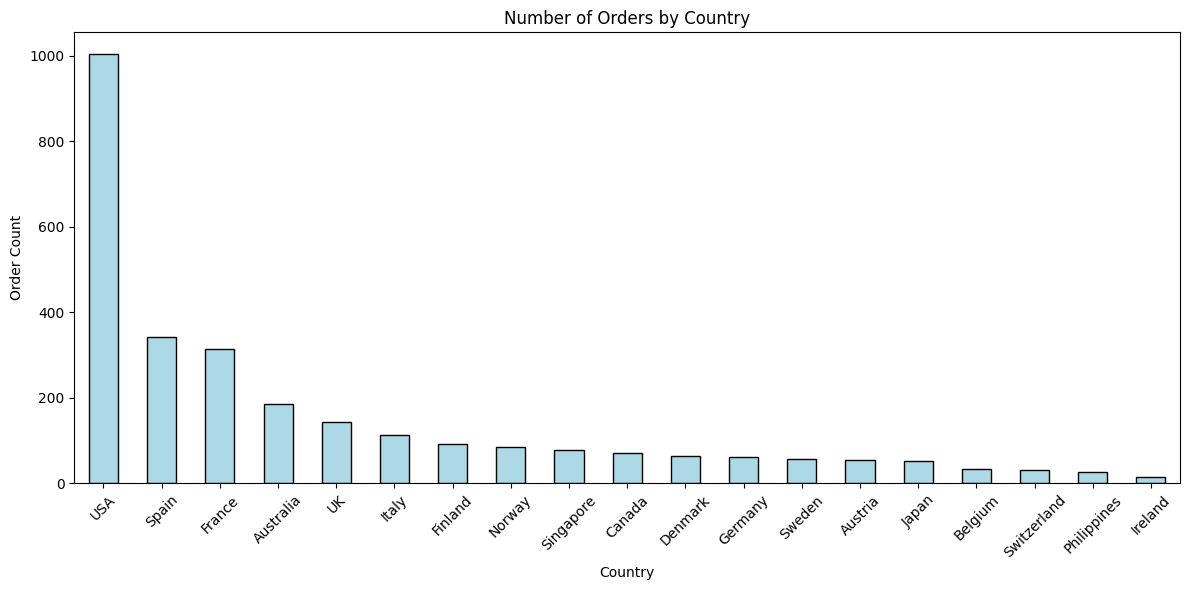

In [10]:
# --- Step 6: Country Value Counts ---
plt.figure(figsize=(12, 6))
df_csv["COUNTRY"].value_counts().plot(kind="bar", color="lightblue", edgecolor="black")
plt.title("Number of Orders by Country")
plt.xlabel("Country")
plt.ylabel("Order Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
# --- Step 7: Unique Countries ---
print("\nUnique Countries:\n", df_csv["COUNTRY"].unique())


Unique Countries:
 ['USA' 'France' 'Norway' 'Australia' 'Finland' 'Austria' 'UK' 'Spain'
 'Sweden' 'Singapore' 'Canada' 'Japan' 'Italy' 'Denmark' 'Belgium'
 'Philippines' 'Germany' 'Switzerland' 'Ireland']


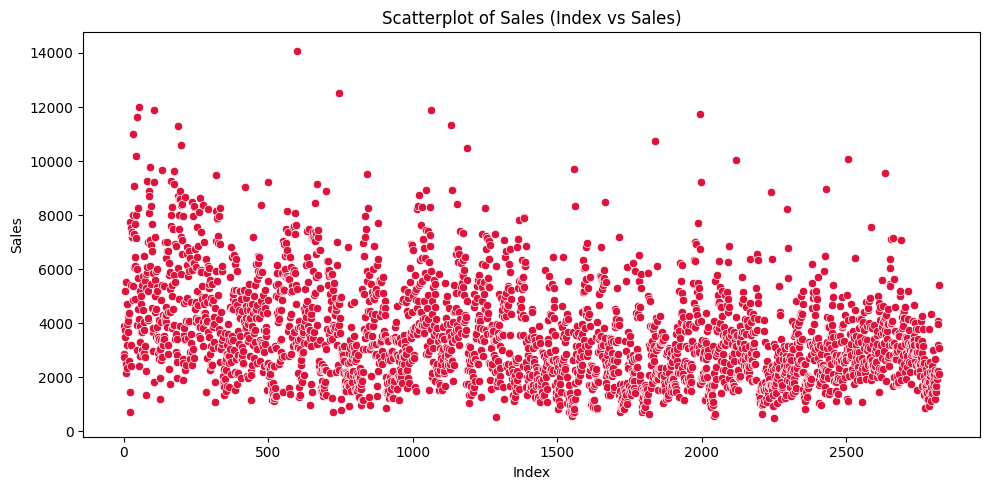

In [12]:
# --- Step 8: Scatterplot (Sales vs Index) ---
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df_csv.index, y=df_csv["SALES"], color="crimson")
plt.title("Scatterplot of Sales (Index vs Sales)")
plt.xlabel("Index")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()

In [13]:
# --- Step 9: Sales Summary ---
print("\n--- Sales Summary ---")
print(f"Mean Sales: {df_csv['SALES'].mean():.2f}")
print(f"Median Sales: {df_csv['SALES'].median():.2f}")
print(f"Mode Sales: {df_csv['SALES'].mode()[0]:.2f}")
print(f"Total Sales: {df_csv['SALES'].sum():.2f}\n")


--- Sales Summary ---
Mean Sales: 3553.89
Median Sales: 3184.80
Mode Sales: 3003.00
Total Sales: 10032628.85



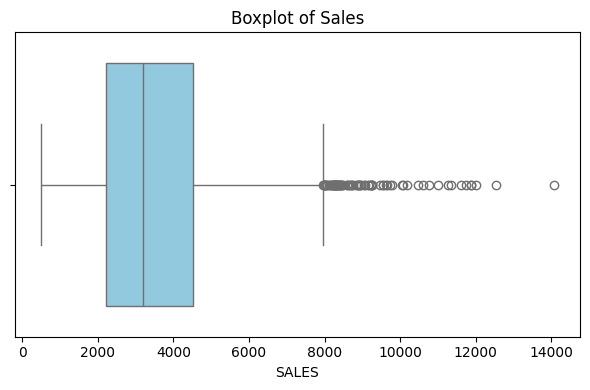

In [14]:
# --- Step 10: Boxplot of Sales ---
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_csv['SALES'], color="skyblue")
plt.title("Boxplot of Sales")
plt.tight_layout()
plt.show()

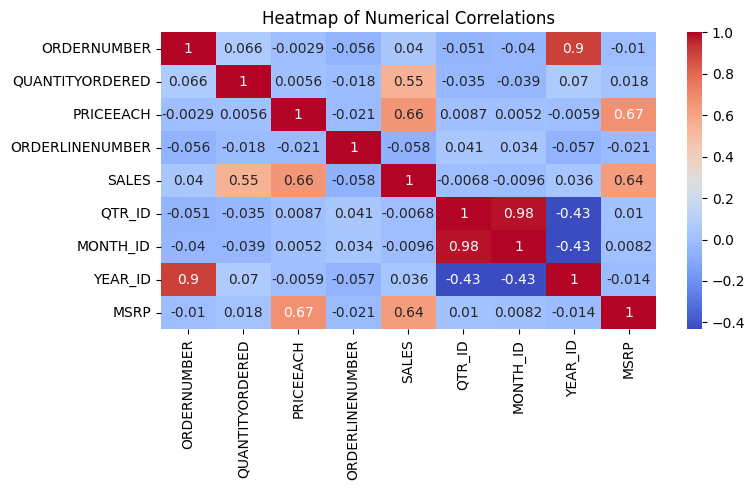

In [15]:
# --- Step 11: Heatmap of Correlations ---
plt.figure(figsize=(8, 5))
sns.heatmap(df_csv.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Heatmap of Numerical Correlations")
plt.tight_layout()
plt.show()

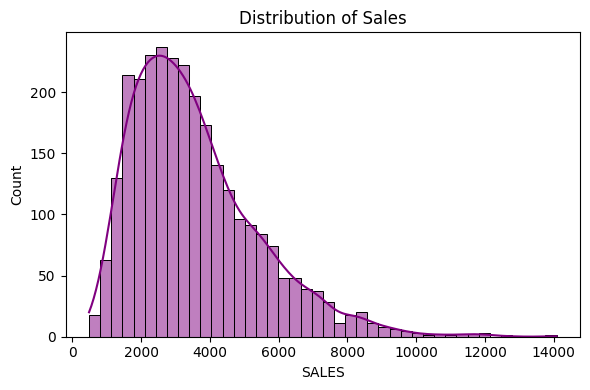

In [16]:
# --- Step 12: Sales Distribution ---
plt.figure(figsize=(6, 4))
sns.histplot(df_csv['SALES'], kde=True, color="purple")
plt.title("Distribution of Sales")
plt.tight_layout()
plt.show()

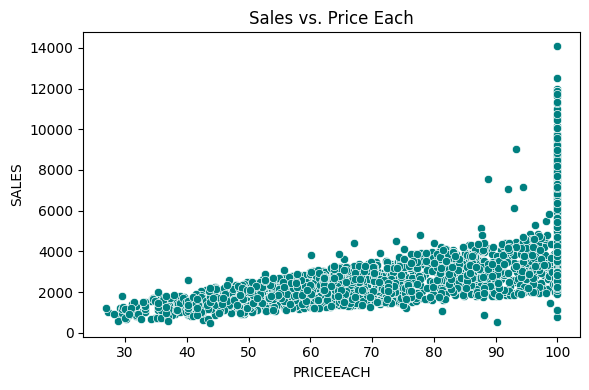

In [17]:
# --- Step 13: Scatterplot (Sales vs Price Each) ---
plt.figure(figsize=(6, 4))
sns.scatterplot(x="PRICEEACH", y="SALES", data=df_csv, color="teal")
plt.title("Sales vs. Price Each")
plt.tight_layout()
plt.show()

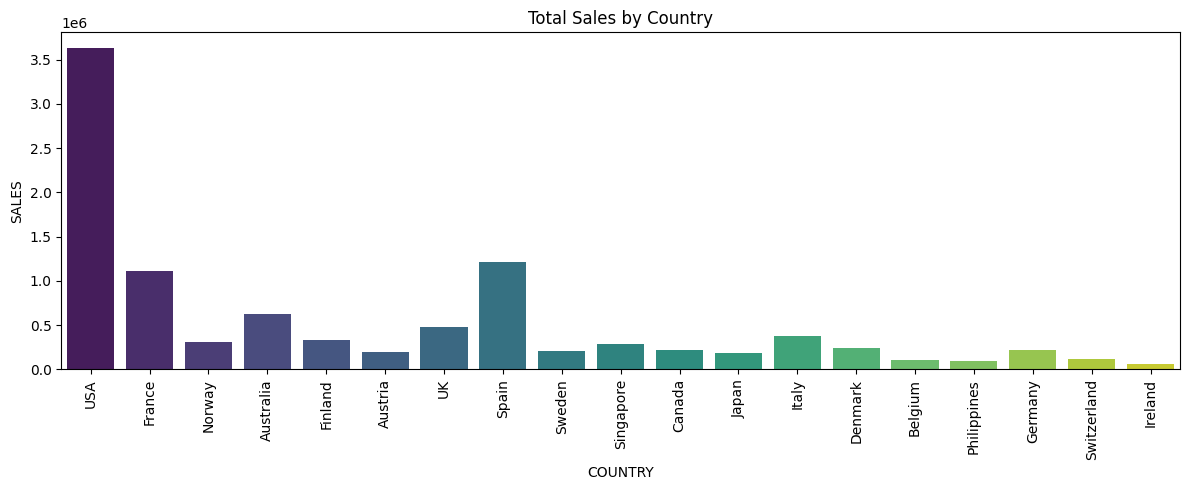

In [18]:
# --- Step 14: Total Sales by Country (Fixed Warning) ---
plt.figure(figsize=(12, 5))
sns.barplot(
    x="COUNTRY", 
    y="SALES", 
    hue="COUNTRY",        
    data=df_csv, 
    estimator=sum, 
    errorbar=None, 
    palette="viridis", 
    legend=False          
)
plt.xticks(rotation=90)
plt.title("Total Sales by Country")
plt.tight_layout()
plt.show()

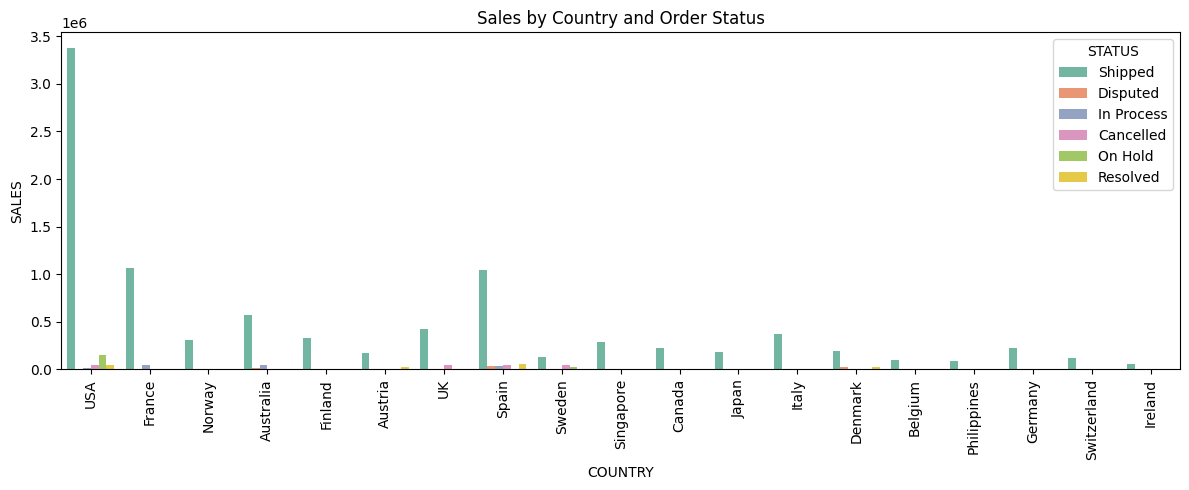

In [19]:

# --- Step 15: Sales by Country and Order Status ---
plt.figure(figsize=(12, 5))
sns.barplot(x="COUNTRY", y="SALES", hue="STATUS", data=df_csv, estimator=sum, errorbar=None, palette="Set2")
plt.xticks(rotation=90)
plt.title("Sales by Country and Order Status")
plt.tight_layout()
plt.show()